# Data Science Aplicada à Área de Saúde

#### Mini-Projeto 1 - Prevendo a Ocorrência de Crises Epiléticas

## Etapa 1 - Definição do Problema

Objetivo: Prever se um paciente está tendo uma convulsão ou não através de 178 leituras de EEG por segundo.
    
Como métrica de avaliação do modelo, foi usado a AUC Score (Area Under The Curve Score), cujo valor vai de 1 a 100% e para esse problema o valor da métrica deve ser aproximadamente de 99%, uma vez que a previsão do modelo está relacionada a casos de vida ou morte. Será usado a métrica calculada no dataset de validação
    

## Etapa 2 - Compreensão dos dados

O conjunto de dados original da referência consiste em 5 pastas diferentes, cada uma com 100 arquivos, com cada arquivo representando um único sujeito/pessoa. Cada arquivo é uma gravação da atividade cerebral por 23,6 segundos. A série temporal correspondente é amostrada em 4097 pontos de dados. Cada ponto de dados é o valor da gravação de EEG em um ponto diferente no tempo. Portanto, temos um total de 500 indivíduos, cada um com 4097 pontos de dados por 23,5 segundos.

### Análise Exploratória

In [1]:
# carregando dados
import pandas as pd
dataset = pd.read_csv("dados/dados_originais.csv")

In [2]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
# colocando True onde o valor for igual a 1 e False onde o valor for diferente
dataset["Label_Variavel_Target"] = dataset.y == 1

In [4]:
#visualizando alguns registros
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Label_Variavel_Target
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,False
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,True
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,False
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,False
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,False


In [5]:
#conversão dos valores booleanos em inteiros
dataset["Label_Variavel_Target"] = dataset["Label_Variavel_Target"].astype(int)

In [6]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Label_Variavel_Target
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,0


In [7]:
# A coluna (Y) que continha se um paciente está tendo uma convulsão será eliminada, pois era uma váriavel
# categórica com 5 status diferentes. Desde então, foi convertido os valores em uma váriavel numérica binária
# chamada Label_Varivael_Target
dataset.pop('y')

0        4
1        1
2        5
3        5
4        5
        ..
11495    2
11496    1
11497    5
11498    3
11499    4
Name: y, Length: 11500, dtype: int64

In [8]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,Label_Variavel_Target
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [9]:
# A primeira coluna será descartada devido à sua inutilidade em nosso modelo de aprendizado de máquina
dataset.drop(dataset.columns[0], axis = 1, inplace = True)

In [10]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,Label_Variavel_Target
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [11]:
print("Número de colunas:", len(dataset.columns))

Número de colunas: 179


## Calcular a prevalência da classe positiva


#### A prevalência é a porcentagem de suas amostras que tem a característica que você está tentando prever. Nesse cenário específico, significa que as pessoas que têm uma convulsão são positivas, enquanto as que não sofrem são negativas. A taxa é calculada por (número de amostras positivas / número de amostras). Portando, uma taxa de prevalência de 0,2 significa que 20% de nossa amostra está tendo uma convulsão naquele momento

In [12]:
# Esta função calcula a prevalência da classe positiva (label = 1)
def calcula_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)

print("Prevalência da classe positiva: %.3f"% calcula_prevalencia(dataset["Label_Variavel_Target"].values))

Prevalência da classe positiva: 0.200


## Etapa 3: Preparação dos Dados

 Nesta etapa realizamos o processamento de recursos que serão categóricos ou ordinais em váriaveis numéricas legíveis para o nosso algoritmo de aprendizado de máquina. Por exemplo, variáveis categóricas podem ser processadas com condificação one-shot, ou variáveis ordinais podem ser processadas com codificação de rótulo, para que nosso algoritmo de aprendizado  de máquina possa entendê-las.

 Para o conjunto de dados de epilepsia, existem 178 recursos (colunas), no entanto, uma vez que cada coluna representa um ponto de dados em um ponto especifico no tempo e são todas as leituras de EEG, não há necessidade de realizar transformação adicional.

In [13]:
# Preparando o dataset somente com os dados de interesse
collist = dataset.columns.tolist()
cols_input = collist[0:178]
df_data = dataset[cols_input + ['Label_Variavel_Target']]

In [14]:
df_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,Label_Variavel_Target
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [15]:
# Chegando se temos colunas duplicadas nos dados de entrada
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "você duplicou colunas em cols_input"

set()


In [16]:
# Chegando se temos colunas duplicadas nos dados finais
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "você duplicou colunas em cols_input"

set()


## Etapa 4: Modelagem

Divisão dos daods em treino, validação e teste

Geralmente, podemos dividir o conjunto de dados em 50/25/25, 60/20/20, 70/15/15 como a divisão para amostras 
de treinamento / validação / teste , isso também depende de quantas amostras temos. Se tivermos um conjunto 
de dados extremamente grande (centenas de milhões de linhas), podemos usar uma divisão como 98/1/1.

A divisão de treinamento é usada para treinar nosso algoritmo de aprendizado de máquina, por isso queremos 
usar a maioria de nossos conjuntos de dados. O conjunto de dados de validação é usado para ajustar os 
hiperparâmetros e selecionar a abordagem de melhor desempenho. O conjunto de dados de teste é 
usado para testar a precisão do nosso modelo de aprendizado de máquina.

In [17]:
# Gerando amostras aleatórias dos dados
df_data = df_data.sample(n = len(df_data))

# Ajustando os índices do dataset
df_data = df_data.reset_index(drop = True)

In [18]:
# Gera um índice para a divisão
df_valid_teste = df_data.sample(frac = 0.3)
print("Tamanho da divisão de validação / teste: %.1f" % (len(df_valid_teste) / len(df_data)))

Tamanho da divisão de validação / teste: 0.3


In [19]:
#fazendo a divisão 

#dados de teste
df_teste = df_valid_teste.sample(frac = 0.5)

#dados de validação
df_valid = df_valid_teste.drop(df_teste.index)

#dados de treino
df_treino = df_data.drop(df_valid_teste.index)

In [20]:
#verifique a prevalência de cada subconjunto
print("Teste (n = %d): %.3f" % (len(df_teste), calcula_prevalencia(df_teste.Label_Variavel_Target.values)))

print("Validação (n = %d)? %.3f" % (len(df_valid), calcula_prevalencia(df_valid.Label_Variavel_Target.values)))
      
print("treino (n = %d)? %.3f" % (len(df_treino), calcula_prevalencia(df_valid.Label_Variavel_Target.values)))
      

Teste (n = 1725): 0.198
Validação (n = 1725)? 0.201
treino (n = 8050)? 0.201


In [21]:
print('Todas as amostras (n = %d)' %len(df_data))
assert len(df_data) == (len(df_teste)+len(df_valid)+len(df_treino)), 'algo saiu errado'

Todas as amostras (n = 11500)


Queremos equilibrar nosso conjunto de dados para evitar a criação de um modelo em que ele classifique 
incorretamente as amostras como pertencentes à classe majoritária. Por Exemplo, se tivermos um conjunto de
dados de detecção de fraude e a maioria dos casos for "não é fraude", o modelo de classificação binária
tenderia a favorecer a classe "não é fraude", o que leva a resultados enganosos.

Equilibramos nosso conjunto de dados para que as proporções de cada classe sejam as mesmas para evitar a 
criação de um modelo incorreto.

Como temos 2300 amostras positivas, podemos usar o método de balanceamento de subamostras para usar apenas
um subconjunto aleatório das amostras negativas.

In [22]:
import numpy as np

# criar um indice 
rows_pos = df_treino.Label_Variavel_Target == 1

#define valores positivos e negativos do índice
df_train_pos = df_treino.loc[rows_pos]
df_train_neg = df_treino.loc[~rows_pos]

# valor minímo 
n = np.min([len(df_train_pos), len(df_train_neg)])

# obtém valores aleatórios para o dataset de treino
df_treino_final = pd.concat([df_train_pos.sample(n=n, random_state = 69),
                             df_train_neg.sample(n=n, random_state = 69)],
                            axis = 0,
                            ignore_index = True)

df_treino_final = df_treino_final.sample(n = len(df_treino_final), random_state=69).reset_index(drop = True)

print('Balanceamento em Treino (n = %d): %.3f' % (len(df_treino_final), calcula_prevalencia(df_treino_final.Label_Variavel_Target.values)))

Balanceamento em Treino (n = 3226): 0.500


In [23]:
# Salvando todos os datasets em disco no formato csv.
df_treino.to_csv('dados/dados_treino.csv', index = False)
df_treino_final.to_csv('dados/dados_treino_final.csv', index = False)
df_valid.to_csv('dados/dados_valid.csv', index = False)
df_teste.to_csv('dados/dados_teste.csv', index = False)

# Salvamos os dados de entrada (colunas preditoras) para facilitar a utilização mais tarde
import pickle
pickle.dump(cols_input, open('dados/cols_input.sav', 'wb'))

In [24]:
# Cria as matrizes X e Y

# X
X_treino = df_treino_final[cols_input].values
X_valid = df_valid[cols_input].values

# Y
y_treino = df_treino_final['Label_Variavel_Target'].values
y_valid = df_valid['Label_Variavel_Target'].values

# print
print('Shape dos dados de treino: ', X_treino.shape, y_treino.shape)
print('Shape dos dados de validação', X_valid.shape, y_valid.shape)

Shape dos dados de treino:  (3226, 178) (3226,)
Shape dos dados de validação (1725, 178) (1725,)


In [25]:
X_treino

array([[ -95,  -84,  -76, ...,  143,  117,   87],
       [ -22,   -4,   15, ..., -230, -262, -305],
       [-239, -235, -232, ...,  221,  228,  240],
       ...,
       [ -92,  -88,  -61, ...,  -29,   16,   57],
       [  -6,  -28,  -39, ...,  -26,  -41,  -50],
       [  25,   18,   25, ...,  -23,  -28,  -22]], dtype=int64)

In [26]:
# Prepara o objeto para normalizar os dados
from sklearn.preprocessing import StandardScaler

# Crio o objeto
scaler = StandardScaler()

# Faço o fit
scaler.fit(X_treino)

# Salva o objeto em disco e carrega para usarmos adiante
scalerfile = 'dados/scaler.sav'

import pickle
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# Aplica a normalização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)

In [27]:
X_treino_tf

array([[-0.31176257, -0.27396714, -0.25658104, ...,  0.66016401,
         0.55717467,  0.42543921],
       [-0.01765415,  0.04588014,  0.11195793, ..., -0.86293542,
        -1.00194016, -1.16545502],
       [-0.89192164, -0.87767888, -0.88836213, ...,  0.97866737,
         1.01380197,  1.04637496],
       ...,
       [-0.29967592, -0.2899595 , -0.19583286, ..., -0.04217675,
         0.14168497,  0.3036871 ],
       [ 0.04680797, -0.05007404, -0.10673552, ..., -0.02992662,
        -0.09279932, -0.13056209],
       [ 0.17170333,  0.13383814,  0.15245672, ..., -0.01767649,
        -0.03932045, -0.01692679]])

### Construção do modelo

Funções auxiliares

In [28]:
# Importa as funções necessárias
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

# Função para calcular a especificidade
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

# Função para gerar relatório de métricas
def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('Acurácia:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('Especificidade:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision, specificity

Como os dados de treinamento foram equilibrados, o limite foi definido em 0,5 para rotular uma amostra prevista como positiva

In [29]:
thresh = 0.5

### Criação de modelo

#### Modelo 1 - Regressão Logística

A regressão logística é um tipo de modelo linear generalizado, que é uma generalização dos conceitos e habilidades dos modelos lineares regulares.

A regressão logística utiliza seus recursos de entrada e executa uma função linear projetando os pontos da amostra na linha. A função linear é executada somando o log de probabilidade de cada ponto de amostra e produz uma linha de regressão logística mais adequada maximizando o log de probabilidade, que é o mesmo que maximar a probabilidade. A função de melhor ajuste preveria a probabilidade da classe positiva muito próxima de 1 (100%) e a classe negativa muito proxima de 0, em um modelo de clássificação binária.

No entanto, maximizar a função de custo levará a sobreajuste da própria função, portanto penalizamos a função executando L1,L2 ou regularização elastic net. Por fim, a decida do gradiente é realizada para minimizar a função de custo com regularização.

Observe que a regressão logística produz a probabilidade de uma classe: portanto, para transformar isso em um modelo de classificação binária, é preciso definir um limite para a probabilidade da classe positiva. Por exemplo, se p (masculino) > 0.5, classifique-o como masculino.

In [30]:
# Construção do modelo

# Import
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Cria o classificador (objeto)
lr = LogisticRegression(solver='liblinear', random_state = 42)

# Treina e cria o modelo
modelo_v1 = lr.fit(X_treino_tf, y_treino)

# Previsões 
y_train_preds = lr.predict_proba(X_treino_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Regressão Logística')

print('Treinamento:')
lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity = print_report(y_treino, y_train_preds, thresh)

print('Validação:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, lr_valid_precision, lr_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Regressão Logística
Treinamento:
AUC:0.621
Acurácia:0.650
Recall:0.523
Precisão:0.702
Especificidade:0.778
 
Validação:
AUC:0.527
Acurácia:0.696
Recall:0.436
Precisão:0.314
Especificidade:0.761
 


#### Naive Bayes

O Classificar Naive Bayes usa o teorema de Bayes para realizar a classificação. Ele pressupõe que, se todos os recursos não estiverem relacionados, a probabilidade de vê-los juntos é apenas o produto da probabilidade de cada recurso acontecer.

Ele encontra a probabilidade de cada recurso dado a classe. Por exemplo, se um de nossos recursos é a previsão do tempo e a váriavel dependente é se jogaremos ou não golfe, encontraremos a probabilidade de cada categoria de previsão do tempo, uma vez que jogamos e não jogamos.

Usando esses resultados e mulplicamos todos eles juntos. Isso nos dá um valor que representa a probabilidade de X, dada uma classe vezes a probabilidade de uma classe, P(X|C) P(C). Fazemos isso para ambas as classes, depois dividimos os lados por P(X) para normalizar.

Por fim, para determinar se classificaremos ou não uma amostra no cenário X, comparamos a probabilidade normalizada do cenário X, dada sua classe, a amostra será classificada que tem uma probabilidade maior.

In [31]:
# Construção do modelo

# Imports
from sklearn.naive_bayes import GaussianNB

# Cria o classificador (objeto)
nb = GaussianNB()

# Treina e cria o modelo
modelo_v2 = nb.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = nb.predict_proba(X_treino_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')

print('Treinamento: ')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity = print_report(y_treino, y_train_preds, thresh)

print('Validação:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Naive Bayes
Treinamento: 
AUC:0.984
Acurácia:0.930
Recall:0.885
Precisão:0.972
Especificidade:0.975
 
Validação:
AUC:0.987
Acurácia:0.965
Recall:0.919
Precisão:0.906
Especificidade:0.976
 


#### XGBoost (Xtreme Gradient Boosting Classifier)

XGBoost é um modelo de método ensemble que cria várias árvores de decisão e processa de forma paralela, sendo muito poderoso e preciso. É um modelo sofisticado.

Parâmetro de randomização extra é usado para reduzir as correlações entre árvores

In [34]:
# Construção do modelo

# Imports 
from xgboost import XGBClassifier
import xgboost as xgb

# Criar Classificador
xgbc = XGBClassifier()

# Treina e cria o modelo
modelo_v3 = xgbc.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = xgbc.predict_proba(X_treino_tf)[:,1]
y_valid_preds = xgbc.predict_proba(X_valid_tf)[:,1]

print('Xtreme Gradient Boosting Classifier')

print('Treinamento: ')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(y_treino, y_train_preds, thresh)

print('Validação:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Xtreme Gradient Boosting Classifier
Treinamento: 
AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:
AUC:0.995
Acurácia:0.966
Recall:0.965
Precisão:0.877
Especificidade:0.966
 


### Etapa 5: Avaliação e validação dos modelo

Vamor criar um dataframe com esses resultados e plotar os resultados usando o seaborn

In [46]:
df_results = pd.DataFrame({'classificador':['RL','RL','NB','NB','XGB','XGB'],
                           'data_set':['treino','validação']*3,
                          'auc':[lr_train_auc,lr_valid_auc,nb_train_auc,nb_valid_auc,xgbc_train_auc,xgbc_valid_auc],
                          'accuracy':[lr_train_accuracy,lr_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy],
                          'recall':[lr_train_recall,lr_valid_recall,nb_train_recall,nb_valid_recall,xgbc_train_recall,xgbc_valid_recall],
                          'precision':[lr_train_precision,lr_valid_precision,nb_train_precision,nb_valid_precision,xgbc_train_precision,xgbc_valid_precision],
                          'specificity':[lr_train_specificity,lr_valid_specificity,nb_train_specificity,nb_valid_specificity,xgbc_train_specificity,xgbc_valid_specificity]})

In [38]:
# Imports e definição do estilo gráfico do seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "whitegrid")

A métrica de desempenho escolhida será a pontuação AUC(AUC Score) do conjunto de validação. É a pontuação mais comum usada para comparar qual modelo é melhor na classificação de amostras

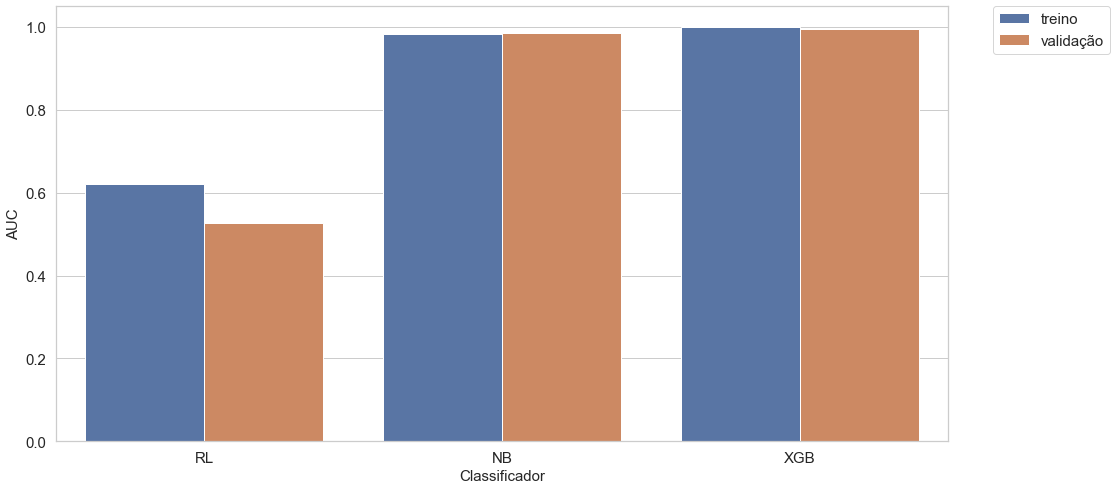

In [47]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classificador', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

Nosso melhor modelo é o Classificador XGBoost, com uma AUC de validação 99.5%.

#### Gravando o melhor modelo

In [49]:
# Grava o modelo em disco
pickle.dump(modelo_v3, open('dados/melhor_modelo.pkl', 'wb'), protocol = 4)

#### Avaliando o modelo

In [51]:
# Carrega o modelo, as colunas e o scaler
best_model = pickle.load(open('dados/melhor_modelo.pkl','rb'))
cols_input = pickle.load(open('dados/cols_input.sav','rb'))
scaler = pickle.load(open('dados/scaler.sav', 'rb'))

# Carrega os dados
df_train = pd.read_csv('dados/dados_treino.csv')
df_valid= pd.read_csv('dados/dados_valid.csv')
df_test= pd.read_csv('dados/dados_teste.csv')

# Cria matrizes x e y

# X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

# Y
y_train = df_train['Label_Variavel_Target'].values
y_valid = df_valid['Label_Variavel_Target'].values
y_test = df_test['Label_Variavel_Target'].values

# Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

calcular probabilidades de previsão

In [52]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

Avaliação de desempenho

In [53]:
thresh = 0.5

print('\nTreinamento:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)

print('\nValidação:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)

print('\nTeste:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)


Treinamento:
AUC:0.999
Acurácia:0.973
Recall:1.000
Precisão:0.879
Especificidade:0.966
 

Validação:
AUC:0.995
Acurácia:0.966
Recall:0.965
Precisão:0.877
Especificidade:0.966
 

Teste:
AUC:0.992
Acurácia:0.952
Recall:0.930
Precisão:0.845
Especificidade:0.958
 


Curva ROC

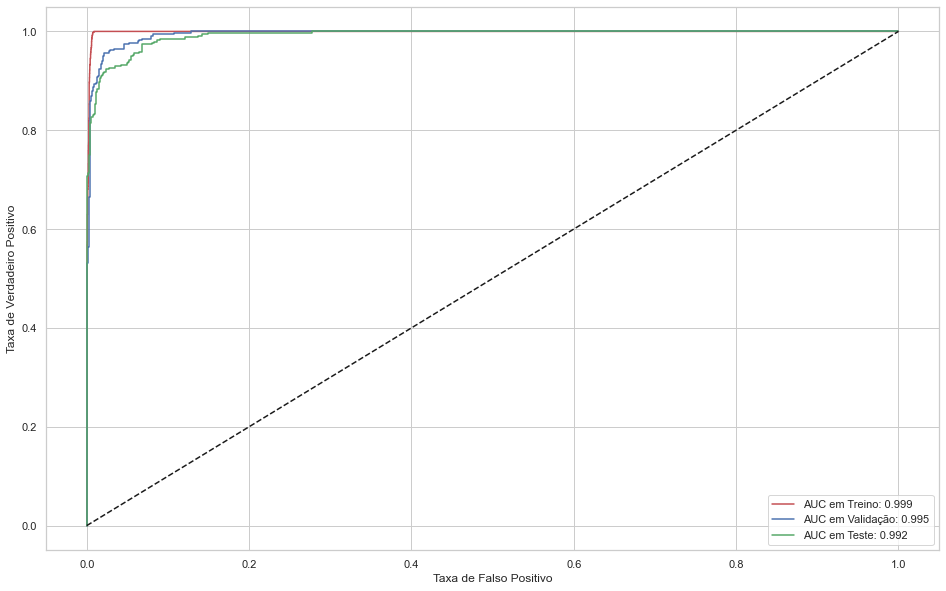

In [54]:
# Imports
from sklearn.metrics import roc_curve 

# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='AUC em Treino: %.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='AUC em Validação: %.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='AUC em Teste: %.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()

### Etapa 6: Deploy do modelo

In [56]:
# Carregando dados de um novo paciente
novo_paciente = pd.read_csv('dados/novo_paciente.csv')

In [57]:
novo_paciente.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,51,43,34,21,13,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [58]:
novo_paciente_scaled = scaler.transform(novo_paciente)

In [59]:
best_model.predict_proba(novo_paciente_scaled)

array([[9.9994302e-01, 5.7010624e-05]], dtype=float32)

In [65]:
if best_model.predict(novo_paciente_scaled)[0] == 0:
    print("este paciente não está tendo uma crise epilética")
else:
    print("este paciente está tendo uma crise epilética")

este paciente não está tendo uma crise epilética
